<a href="https://colab.research.google.com/github/egagli/glacier-velocity-from-sar/blob/Bareera/Sparse_Optical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install opencv-python

In [ ]:
#!git clone -b Ahmed https://github.com/egagli/glacier-velocity-from-sar.git

Cloning into 'glacier-velocity-from-sar'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 280 (delta 0), reused 2 (delta 0), pack-reused 277
Receiving objects: 100% (280/280), 823.88 MiB | 27.89 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (41/41), done.


In [39]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)


In [59]:
!pip install muDIC

In [72]:
file=cv2.imread("/content/glacier-velocity-from-sar/images/0image.png")

In [93]:
from google.colab.patches import cv2_imshow

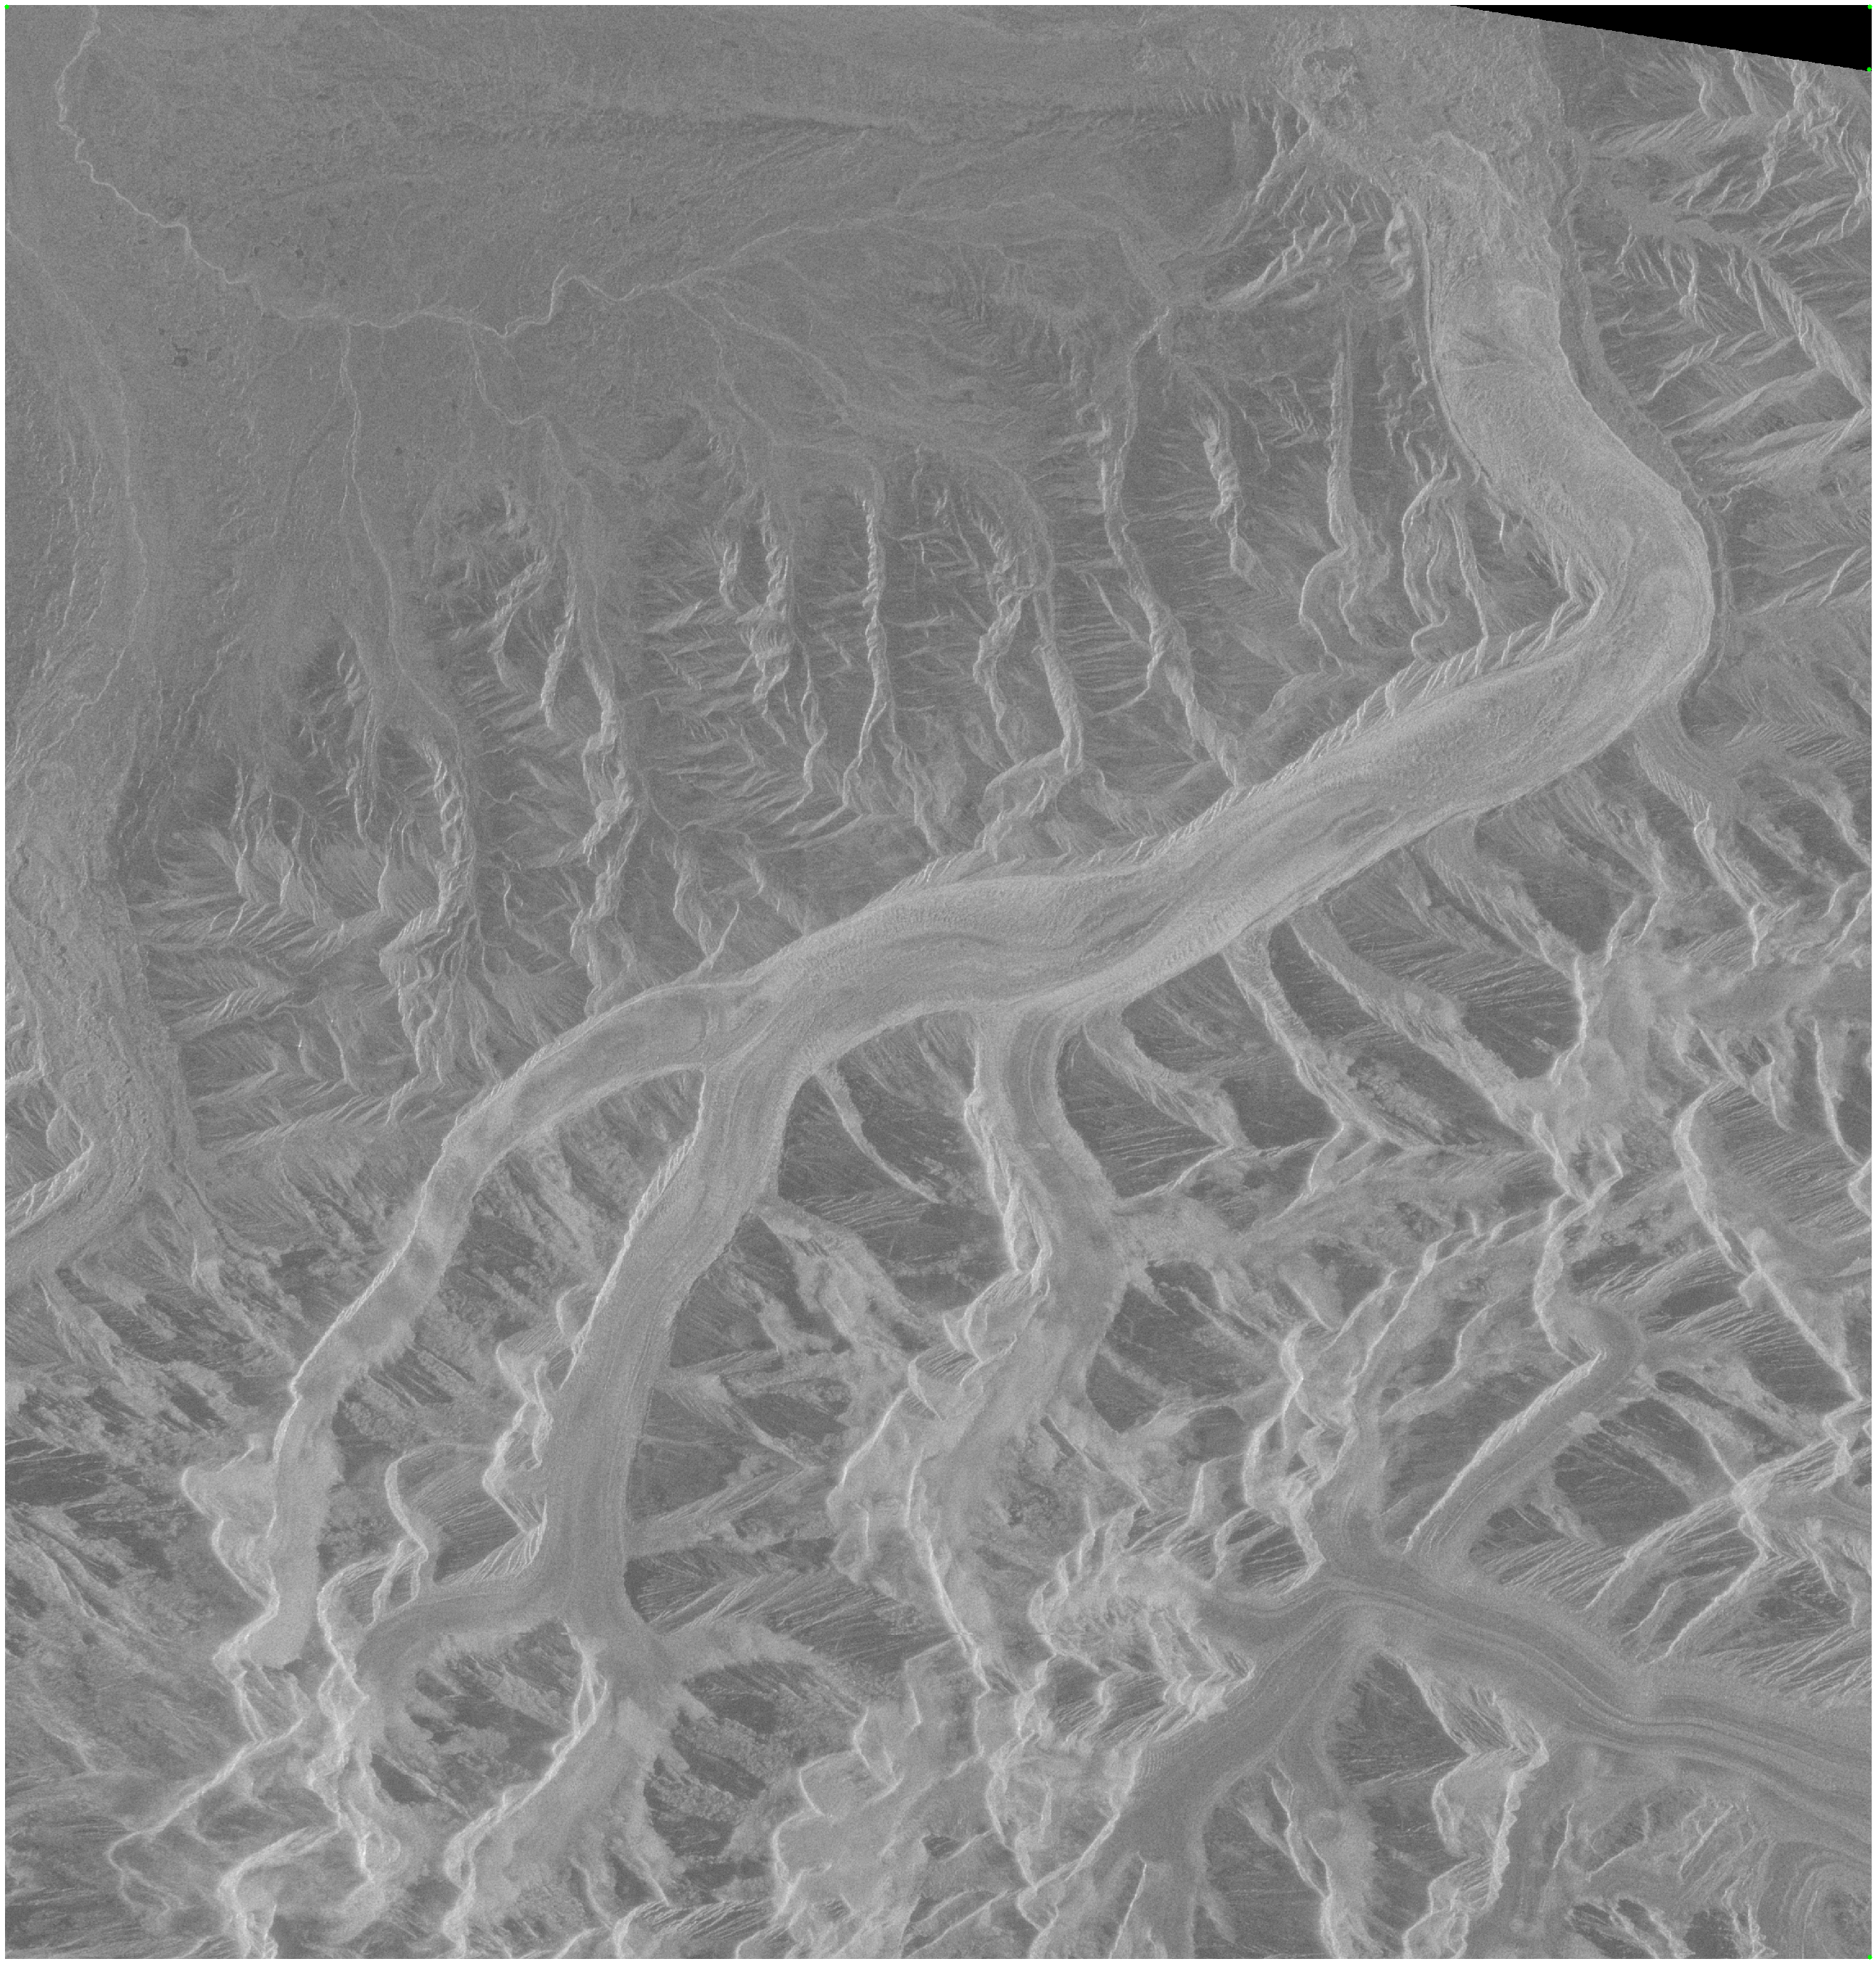

In [123]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# The video feed is read in as a VideoCapture object
first_frame = cv.imread("/content/glacier-velocity-from-sar/images/0image.png")
# Variable for color to draw optical flow track
color = (0, 255, 0)
# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence

# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
# Finds the strongest corners in the first frame by Shi-Tomasi method - we will track the optical flow for these corners
# https://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack
prev = cv.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
# Creates an image filled with zero intensities with the same dimensions as the frame - for later drawing purposes
mask = np.zeros_like(first_frame)

    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
    # Calculates sparse optical flow by Lucas-Kanade method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowpyrlk
next, status, error = cv.calcOpticalFlowPyrLK(prev_gray, gray, prev, None, **lk_params)
    # Selects good feature points for previous position
good_old = prev[status == 1]
    # Selects good feature points for next position
good_new = next[status == 1]

    # Draws the optical flow tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
        # Returns a contiguous flattened array as (x, y) coordinates for new point
        a, b = new.ravel()
        # Returns a contiguous flattened array as (x, y) coordinates for old point
        c, d = old.ravel()
        # Draws line between new and old position with green color and 2 thickness
        mask = cv.line(mask, (a, b), (c, d), color, 2)
        # Draws filled circle (thickness of -1) at new position with green color and radius of 3
        first_frame = cv.circle(frame, (a, b), 3, color, -1)

    # Overlays the optical flow tracks on the original frame
output = cv.add(frame, mask)
    # Updates previous frame
prev_gray = gray.copy()
    # Updates previous good feature points
prev = good_new.reshape(-1, 1, 2)
    # Opens a new window and displays the output frame
cv2_imshow(output)
    # Frames are read by intervals of 10 milliseconds. The programs breaks out of the while loop when the user presses the 'q' key


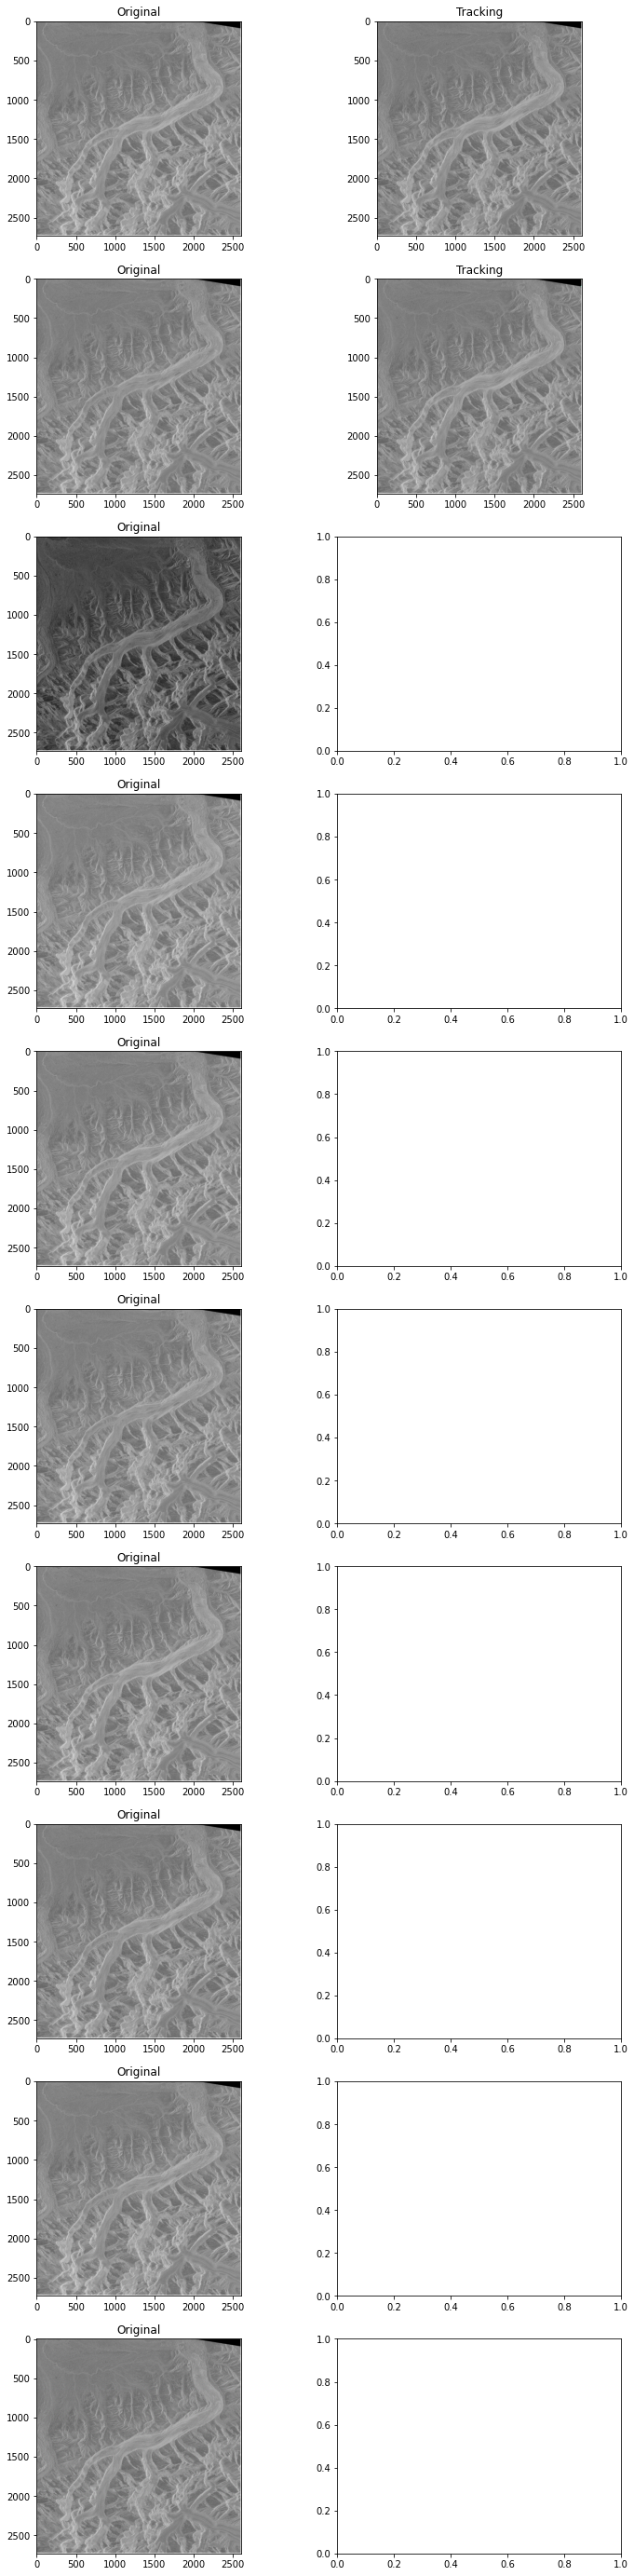

In [119]:
first_frame = cv.imread('/content/glacier-velocity-from-sar/images/0image.png')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

old_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(first_frame)

    
    # calculate optical flow
p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
       # Select good points
if p1 is not None:
  good_new = p1[st==1]
  good_old = p0[st==1]
  
f,ax=plt.subplots(len(glob.glob('/content/glacier-velocity-from-sar/images/*.png')),2,figsize=(12,50))
for i, filename in notebook.tqdm(enumerate(glob.glob('/content/glacier-velocity-from-sar/images/*.png'))): 
    frame = cv.imread(filename)
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    ax[i,0].imshow(frame)
    ax[i,0].set_title('Original')        
    # draw the tracks
for i,(new,old) in enumerate(zip(good_new, good_old)):
 a,b = new.ravel()
 c,d = old.ravel()
 mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
 frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
 img = cv.add(frame,mask)
 ax[i,1].imshow(img)
 ax[i,1].set_title('Tracking')
      
old_gray = frame_gray


    